# Lab #6 (Linear Regression Models)
### By Stakhov K.V. [8.1212]

### 1. For data from `daily-stats.csv`, models should be built for the dependency `distance(flights)`, i.e. the FLIGHTS column is an array of features, the DISTANCE column is a predicted value (an observed target). The program must build models and line-plots using `Ordinary Least Squares`, `Lasso` and `Bayesian Ridge Regression`.

#### First, we load and prepare the flight dataset by extracting the needed columns and splitting data into training and predicting sets:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

seed = 81212

# Load daily flight data and select only two columns: "DISTANCE" & "FLIGHTS"
dst_col, flt_col = "DISTANCE", "FLIGHTS"
data = pd.read_csv(
    "../input/domestic-jet-flights-usa/daily-stats.csv",
    sep = ";"
)[[dst_col, flt_col]]

print(f"Loaded dataframe:\n{data.head()}\n{'.' * 23}")

feature_names = [flt_col]
y_name = dst_col

# Extract numpy arrays from dataframe columns
x = data[flt_col].values.reshape(-1, 1)
y = data[dst_col].values.reshape(-1, 1)

sort_idx = x.flatten().argsort()

# Split data into training and testing sets 70%/30%
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state = seed
)

Loaded dataframe:
     DISTANCE  FLIGHTS
0  910.022844    13877
1  888.760221    15531
2  877.935054    15074
3  860.523747    14528
4  864.509357    14695
.......................


#### Here we define a function that evaluates model's accuracy and builds a line plot of a model and the original data:

In [2]:
def evaluate_model(
    method_name, # Method by which the model was built
    model, # The model to evaluate
    xlabel = "", ylabel = "", title = "", # Plot parameters
):
    print(f"Model {title} built using {method_name}")
    # Use the model to predict data and create a dataset with
    # actual data compared to the predicted one.
    y_pred = model.predict(x_test)
    pred_comparison = pd.DataFrame({
        "Actual" : y_test.squeeze(),
        "Predicted" : y_pred.squeeze(),
    })

    # Calculate errors to determine the model's accuracy
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = model.score(x_train, y_train)
    r2_test = model.score(x_test, y_test)

    # Create a dataframe with all of the model's coefficients
    # with their corresponding feature names.
    coefficients = pd.DataFrame(
        data = model.coef_, 
        index = feature_names, 
        columns = ['Coefficient value']
    )
    
    print(f"Intercept: {mod_ols.intercept_}\n")
    print(f"Model coefficients:\n{coefficients}\n")
    print(f"Actual vs Predicted Data:\n{pred_comparison}\n")
    print("Model Accuracy")
    print(f"R²: {r2_test} / {r2_train} (testing / training)")
    print(f"Mean absolute error: {mae:.12f}")
    print(f"Root mean squared error: {rmse:.12f}")

    tx = x.transpose()
    plot_data = lambda ax: ax.scatter(tx[i], y, label = "Data", color = "mediumblue", alpha = 0.35)
    set_plot_text = lambda ax, feat_idx: ax.set(
            xlabel = xlabel,
            ylabel = ylabel,
            title = f"{y_name}({feature_names[feat_idx]}) Model [{method_name}]"
    )

    for i in range(x.shape[1]):
        fig, ax = plt.subplots()
        plot_data(ax)
        ax.plot(tx[i], model.predict(x), label = "Model", color = "red")
        set_plot_text(ax, i)
        ax.legend()
        fig.show()
    return mae, rmse

#### Then we can build our Linear Regression Model using Ordinary Least Squares and evaluate its accuracy using the function defined above:

Model Distance(Flights) built using Ordinary Least Squares
Intercept: [1007.87488044]

Model coefficients:
         Coefficient value
FLIGHTS          -0.010137

Actual vs Predicted Data:
         Actual   Predicted
0    845.286070  820.344223
1    902.929106  871.172847
2    889.239024  877.883767
3    786.614247  830.278817
4    800.482765  800.535861
..          ...         ...
287  803.248985  788.178443
288  879.027698  869.895542
289  841.944317  848.576716
290  779.714524  819.421725
291  795.713867  796.967517

[292 rows x 2 columns]

Model Accuracy
R²: 0.5815780201265327 / 0.6023699612213316 (testing / training)
Mean absolute error: 17.310916435720
Root mean squared error: 21.669487076200


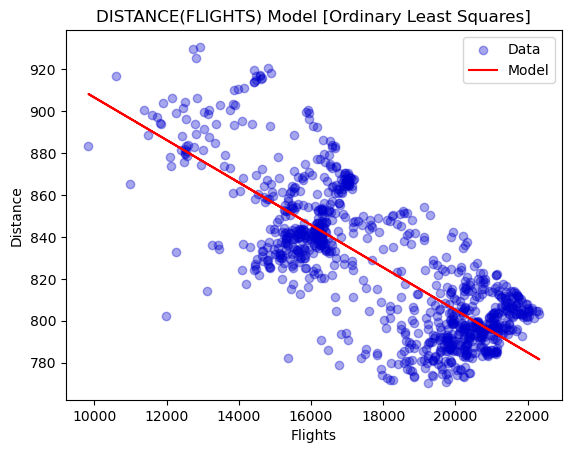

In [3]:
# Build a Linear Regression model using Ordinary Least Squares
mod_ols = LinearRegression().fit(x_train, y_train)
mae_ols, rmse_ols = evaluate_model(
    "Ordinary Least Squares", mod_ols,
    xlabel = "Flights",
    ylabel = "Distance",
    title = "Distance(Flights)"
)

#### After this we'll use Lasso to build our model:

Model Distance(Flights) built using Lasso
Intercept: [1007.87488044]

Model coefficients:
         Coefficient value
FLIGHTS          -0.010137

Actual vs Predicted Data:
         Actual   Predicted
0    845.286070  820.344230
1    902.929106  871.172781
2    889.239024  877.883691
3    786.614247  830.278809
4    800.482765  800.535896
..          ...         ...
287  803.248985  788.178496
288  879.027698  869.895478
289  841.944317  848.576682
290  779.714524  819.421734
291  795.713867  796.967557

[292 rows x 2 columns]

Model Accuracy
R²: 0.5815781588292683 / 0.6023699612200835 (testing / training)
Mean absolute error: 17.310911252044
Root mean squared error: 21.669483484590
Lasso & Ordinary Least Squares comparison:
ΔMean Absolute Error: -5.183676538678128e-06
ΔRoot Mean Squared Error: -3.591610301612036e-06


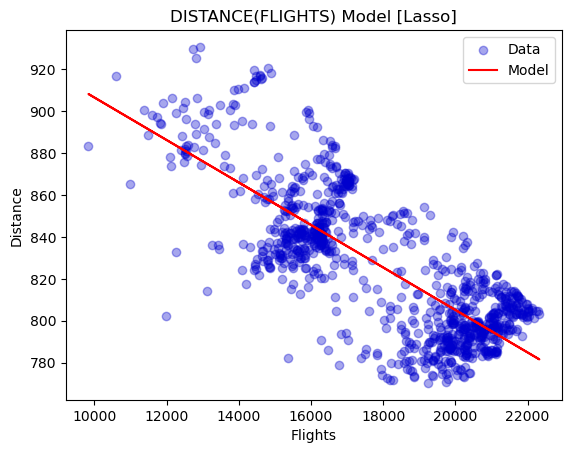

In [4]:
# Build our model using Lasso method
mod_lasso = Lasso(alpha = 0.1).fit(x_train, y_train)
mae_lasso, rmse_lasso = evaluate_model(
    "Lasso", mod_lasso,
    xlabel = "Flights",
    ylabel = "Distance",
    title = "Distance(Flights)"
)
print("Lasso & Ordinary Least Squares comparison:")
print(f"ΔMean Absolute Error: {mae_lasso - mae_ols}")
print(f"ΔRoot Mean Squared Error: {rmse_lasso - rmse_ols}")

As we can see, Lasso method is more accurate than Ordinary Least Squares by $ 5.18*10^{-6} $ in terms of Mean Absolute Error and by $ 3.59*10^{-6} $ in terms of RMS.

#### Now we'll build a model using Bayesian Ridge Regression:

Model Distance(Flights) built using Bayesian Ridge
Intercept: [1007.87488044]

Model coefficients:
         Coefficient value
FLIGHTS          -0.010128

Actual vs Predicted Data:
         Actual   Predicted
0    845.286070  820.348810
1    902.929106  871.129036
2    889.239024  877.833565
3    786.614247  830.273944
4    800.482765  800.559308
..          ...         ...
287  803.248985  788.213657
288  879.027698  869.852947
289  841.944317  848.554420
290  779.714524  819.427190
291  795.713867  796.994362

[292 rows x 2 columns]

Model Accuracy
R²: 0.5816691524133981 / 0.602369415080399 (testing / training)
Mean absolute error: 17.307487652375
Root mean squared error: 21.667127141079
Bayesian Ridge vs Lasso vs Ordinary Least Squares comparison:
ΔLasso[Mean Absolute Error]: -0.003423599669108768
ΔLasso[Root Mean Squared Error]: -0.002356343510754755
ΔOrdinary Least Squares[Mean Absolute Error]: -0.003428783345647446
ΔOrdinary Least Squares[Root Mean Squared Error]: -0.0023599351210

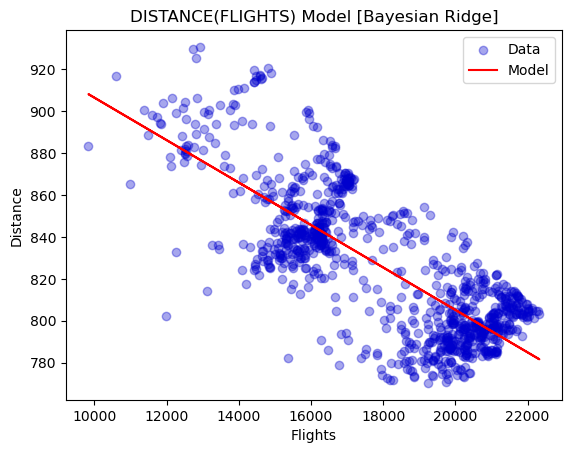

In [5]:
mod_brid = BayesianRidge().fit(x_train, y_train.ravel())
mae_brid, rmse_brid = evaluate_model(
    "Bayesian Ridge", mod_brid,
    xlabel = "Flights",
    ylabel = "Distance",
    title = "Distance(Flights)"
)
print("Bayesian Ridge vs Lasso vs Ordinary Least Squares comparison:")
print(f"ΔLasso[Mean Absolute Error]: {mae_brid - mae_lasso}")
print(f"ΔLasso[Root Mean Squared Error]: {rmse_brid - rmse_lasso}")
print(f"ΔOrdinary Least Squares[Mean Absolute Error]: {mae_brid - mae_ols}")
print(f"ΔOrdinary Least Squares[Root Mean Squared Error]: {rmse_brid - rmse_ols}")

Bayesian Ridge Regression model is the most accurate one among the 3 methods used in this exercise. Its accuracy is higher by a factor of $ 10^{-3} $ than the other two methods.

### 2. For data from `monthly-stats.csv`, models should be built for the dependency `distance(year,month)` using values for years 2017 - 2018 as training data and for the year 2019 as validation data.

### First, we'll tweak the model evaluation and plotting function so it's compatible with multiple regression models:

In [6]:
def evaluate_multi_model(
    method_name, # Method by which the model was built
    model, # The model to evaluate
    xlabel = "", ylabel = "", title = "", # Plot parameters
):
    print(f"Model {title} built using {method_name}")
    # Use the model to predict data and create a dataset with
    # actual data compared to the predicted one.
    y_pred = model.predict(x_test)
    pred_comparison = pd.DataFrame({
        "Actual" : y_test.squeeze(),
        "Predicted" : y_pred.squeeze(),
    })

    # Calculate errors to determine the model's accuracy
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = model.score(x_train, y_train)
    r2_test = model.score(x_test, y_test)

    # Create a dataframe with all of the model's coefficients
    # with their corresponding feature names.
    coefficients = pd.DataFrame(
        data = model.coef_, 
        index = feature_names, 
        columns = ['Coefficient value']
    )
    
    print(f"Intercept: {model.intercept_}\n")
    print(f"Model coefficients:\n{coefficients}\n")
    print(f"Actual vs Predicted Data:\n{pred_comparison}\n")
    print("Model Accuracy")
    print(f"R²: {r2_test} / {r2_train} (testing / training)")
    print(f"Mean absolute error: {mae:.12f}")
    print(f"Root mean squared error: {rmse:.12f}")

    fig, ax = plt.subplots(figsize = (26, 6))
    ax.scatter(x_points, y, label = "Data", color = "mediumblue", alpha = 0.35)
    ax.plot(
        x_points, model.predict(x),
        label = "Model", color = "red", linewidth = 2
    )
    ax.set(
            xlabel = xlabel,
            ylabel = ylabel,
            title = f"{y_name}({feature_names.values}) Model [{method_name}]"
    )
    ax.legend()
    fig.show()
    return mae, rmse

def join_date(df):
    return pd.to_datetime(
        df['month'].map(str)+ '-' +df['year'].map(str),
        format='%m-%Y'
    ).dt.strftime('%m-%Y')

### Then, we'll prepare our data by loading the monthly dataset, extracting the 3 needed columns and splitting the dataset into training (2017 - 2018) and testing (2019) sets:

In [7]:
dst_col, year_col, mon_col = "distance", "year", "month"
# Load the monthly statistics dataset and select only the 3 needed columns from it
data = pd.read_csv(
    "../input/domestic-jet-flights-usa/monthly-stats.csv"
)[[dst_col, year_col, mon_col]]

# Prepare the data
x_df = data[[year_col, mon_col]]
feature_names = x_df.columns
y_name = dst_col
y = data[dst_col].values
x = x_df.values

data_train = data[(data["year"] == 2017) | (data["year"] == 2018)]
data_test = data[data["year"] == 2019]
y_train, x_train = data_train[dst_col].values, data_train[[year_col, mon_col]].values
y_test, x_test = data_test[dst_col].values, data_test[[year_col, mon_col]].values

x_points = join_date(data).values
x_train_points = join_date(data_train).values
x_test_points = join_date(data_test).values

print(f"Training data:\n{data_train}\n")
print(f"Testing data:\n{data_test}\n")
print(f"Training y:\n{y_train}\n\nTraining x:\n{x_train}\n")
print(f"Testing y:\n{y_test}\n\nTesting x:\n{x_test}\n")

Training data:
        distance  year  month
0   26577.789824  2017      1
1   23789.938702  2017      2
2   26486.162291  2017      3
3   25700.390905  2017      4
4   26380.880091  2017      5
5   26109.712089  2017      6
6   27309.899691  2017      7
7   26998.432703  2017      8
8   25404.675682  2017      9
9   26199.605137  2017     10
10  25494.423758  2017     11
11  27100.538073  2017     12
12  24742.567753  2018      1
13  22312.662718  2018      2
14  24949.037986  2018      3
15  23994.569477  2018      4
16  24853.837448  2018      5
17  24460.743199  2018      6
18  25490.019473  2018      7
19  25082.227224  2018      8
20  23899.683598  2018      9
21  24460.281342  2018     10
22  23835.518825  2018     11
23  25169.993984  2018     12

Testing data:
        distance  year  month
24  24914.017190  2019      1
25  22485.864824  2019      2
26  25078.764220  2019      3
27  24106.869974  2019      4
28  24843.179108  2019      5
29  24335.077109  2019      6
30  25311.

### Now we can define our model using Ordinary Least Squares and evaluate its accuracy:

Model Distance(Year, Month) built using Ordinary Least Squares
Intercept: 3438021.3919589

Model coefficients:
       Coefficient value
year        -1691.775493
month          64.484403

Actual vs Predicted Data:
         Actual     Predicted
0  24914.017190  22391.155541
1  22485.864824  22455.639944
2  25078.764220  22520.124348
3  24106.869974  22584.608751
4  24843.179108  22649.093154
5  24335.077109  22713.577557
6  25311.566526  22778.061961
7  24994.473722  22842.546364

Model Accuracy
R²: -4.8493215576047985 / 0.5216610938019812 (testing / training)
Mean absolute error: 1891.875631625309
Root mean squared error: 2053.118736770863


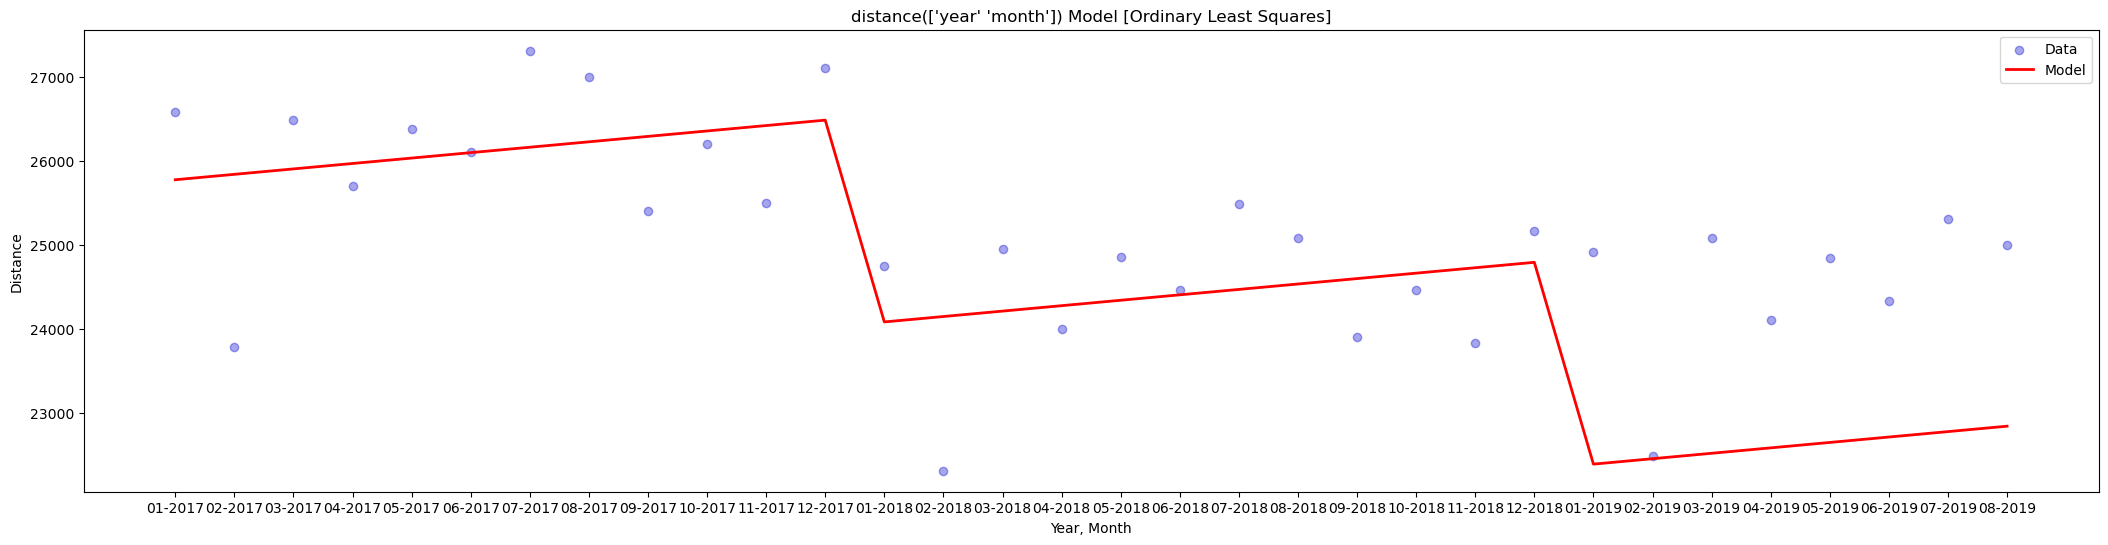

In [8]:
mod_ols = LinearRegression().fit(x_train, y_train)
mae_ols, rmse_ols = evaluate_multi_model(
    "Ordinary Least Squares", mod_ols,
    xlabel = "Year, Month",
    ylabel = "Distance",
    title = "Distance(Year, Month)"
)

As we can see, our testing data yielded a negative R² value, which means that the model is overfitted. In case of the training data, the model describes only 52% of it. Judging by errors we can also tell that this model is extremely inaccurate.

### Now we'll use Lasso method to build the model:

Model Distance(Year, Month) built using Lasso
Intercept: 3438021.3919589

Model coefficients:
       Coefficient value
year        -1691.775493
month          64.484403

Actual vs Predicted Data:
         Actual     Predicted
0  24914.017190  22391.155541
1  22485.864824  22455.639944
2  25078.764220  22520.124348
3  24106.869974  22584.608751
4  24843.179108  22649.093154
5  24335.077109  22713.577557
6  25311.566526  22778.061961
7  24994.473722  22842.546364

Model Accuracy
R²: -4.8493215576047985 / 0.5216610938019812 (testing / training)
Mean absolute error: 1891.875631625309
Root mean squared error: 2053.118736770863
Lasso & Ordinary Least Squares comparison:
ΔMean Absolute Error: 0.0
ΔRoot Mean Squared Error: 0.0


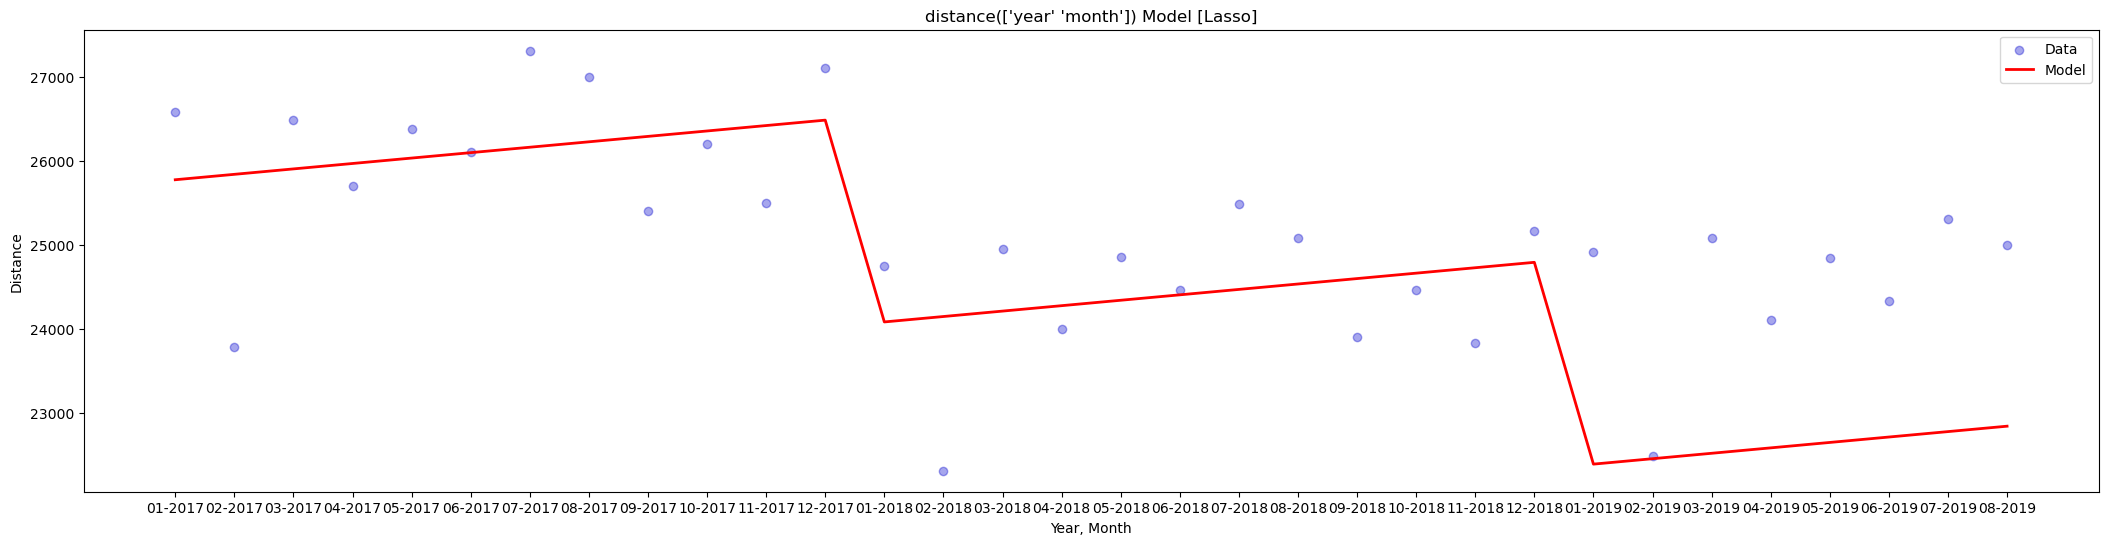

In [9]:
# Build our model using Lasso method
mod_lasso = Lasso(alpha = 0.1).fit(x_train, y_train)
mae_lasso, rmse_lasso = evaluate_multi_model(
    "Lasso", mod_ols,
    xlabel = "Year, Month",
    ylabel = "Distance",
    title = "Distance(Year, Month)"
)
print("Lasso & Ordinary Least Squares comparison:")
print(f"ΔMean Absolute Error: {mae_lasso - mae_ols}")
print(f"ΔRoot Mean Squared Error: {rmse_lasso - rmse_ols}")

### Then we'll build the model using Bayesian Ridge method and compare the accuracy to the other models:

Model Distance(Year, Month) built using Lasso
Intercept: 3438021.3919589

Model coefficients:
       Coefficient value
year        -1691.775493
month          64.484403

Actual vs Predicted Data:
         Actual     Predicted
0  24914.017190  22391.155541
1  22485.864824  22455.639944
2  25078.764220  22520.124348
3  24106.869974  22584.608751
4  24843.179108  22649.093154
5  24335.077109  22713.577557
6  25311.566526  22778.061961
7  24994.473722  22842.546364

Model Accuracy
R²: -4.8493215576047985 / 0.5216610938019812 (testing / training)
Mean absolute error: 1891.875631625309
Root mean squared error: 2053.118736770863
Bayesian Ridge vs Lasso vs Ordinary Least Squares comparison:
ΔLasso[Mean Absolute Error]: 0.0
ΔLasso[Root Mean Squared Error]: 0.0
ΔOrdinary Least Squares[Mean Absolute Error]: 0.0
ΔOrdinary Least Squares[Root Mean Squared Error]: 0.0


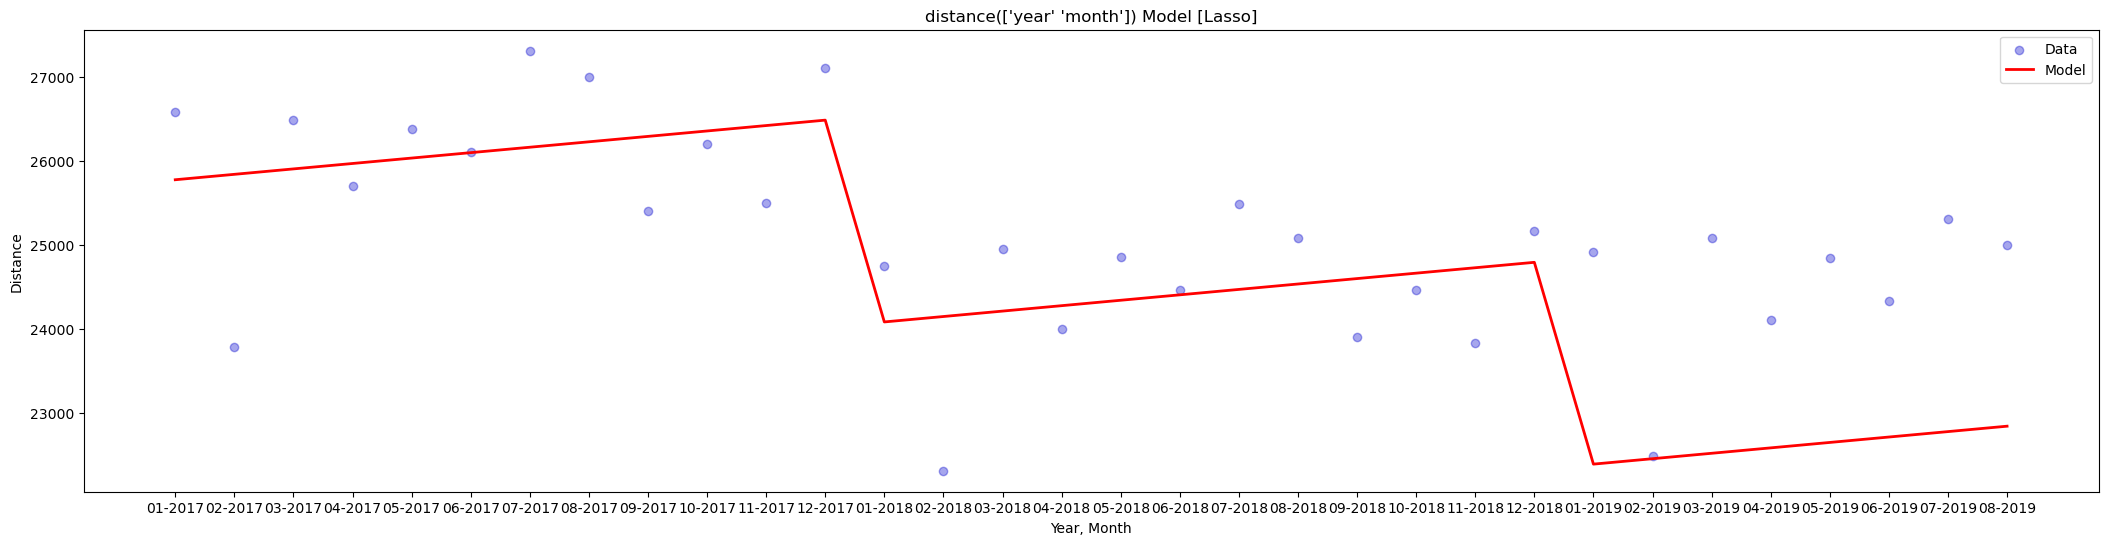

In [10]:
mod_brid = BayesianRidge().fit(x_train, y_train)
mae_brid, rmse_brid = evaluate_multi_model(
    "Lasso", mod_ols,
    xlabel = "Year, Month",
    ylabel = "Distance",
    title = "Distance(Year, Month)"
)
print("Bayesian Ridge vs Lasso vs Ordinary Least Squares comparison:")
print(f"ΔLasso[Mean Absolute Error]: {mae_brid - mae_lasso}")
print(f"ΔLasso[Root Mean Squared Error]: {rmse_brid - rmse_lasso}")
print(f"ΔOrdinary Least Squares[Mean Absolute Error]: {mae_brid - mae_ols}")
print(f"ΔOrdinary Least Squares[Root Mean Squared Error]: {rmse_brid - rmse_ols}")

As a result of accuracy comparisons we can see that all three methods produced identical inaccurate models. This may be possible to fix by increasing the sample size of our dataset or changing the way training / testing sets are created.